In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np 
import matplotlib.pylab as plt
from getdist import plots, MCSamples
import getdist
import pandas as pd
import glob
import sys
import os
from typing import Tuple
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# our script
import utils.helpers as hp
import utils.statistics as us

fontSize = 20

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3}
np.set_printoptions(precision=3)

In [3]:
# 0 omega_cdm
# 1 ln10^{10}A_s
# 2 omega_b
# 3 n_s
# 4 h
# 5 A_IA
# 6 c_min
# 7 dc
# 8 Ac
# Omega_m
# sigma8

cols = [0, 1, 2, 3, 4, 5, 7, 8, 6]

In [4]:
PATH = '../chains/chains-nz-15000/'
fnames = 'KV-450-Bayes-Random-Set-6/2022-05-29_50000__*'

c1 = 'seagreen'# '#B5CA8D'
c3 = 'dodgerblue' #'#222E50'

labels = [r'$\Omega_{\textrm{cdm}}h^{2}$',
          r'$\textrm{ln}10^{10}A_{s}$',
          r'$\Omega_{\textrm{b}}h^{2}$',
          r'$n_{s}$',
          r'$h$',
          r'$A_{\textrm{IA}}$', 
          r'$10^{4}\,\delta c$', 
          r'$A_{c}$',
          r'$A_{\textrm{cmin}}$']

### Load the Samples

In [5]:
all_samples = []
for file in glob.glob(PATH+fnames):
    all_samples.append(np.loadtxt(file))

In [6]:
# the first two columns are the counts and chi2 values respectively
all_samples = np.concatenate(all_samples)[:,2:]
samples = all_samples[:,cols]
samples[:,-3] *= 1E4 

In [7]:
np.mean(all_samples, axis = 0)

array([ 1.456e-01,  2.700e+00,  2.242e-02,  1.005e+00,  7.393e-01,
       -5.302e-01,  2.529e+00, -2.572e-06,  1.024e+00,  3.114e-01,
        7.702e-01])

## Full Triangle Plot

In [8]:
ndim = len(labels)
names = ["x%s"%i for i in range(ndim)]
mainLabel = r'Samples of $n(z)$'

samplesPlot = MCSamples(samples=samples, names = names, labels = labels, settings = settings, label=mainLabel)

Removed no burn in


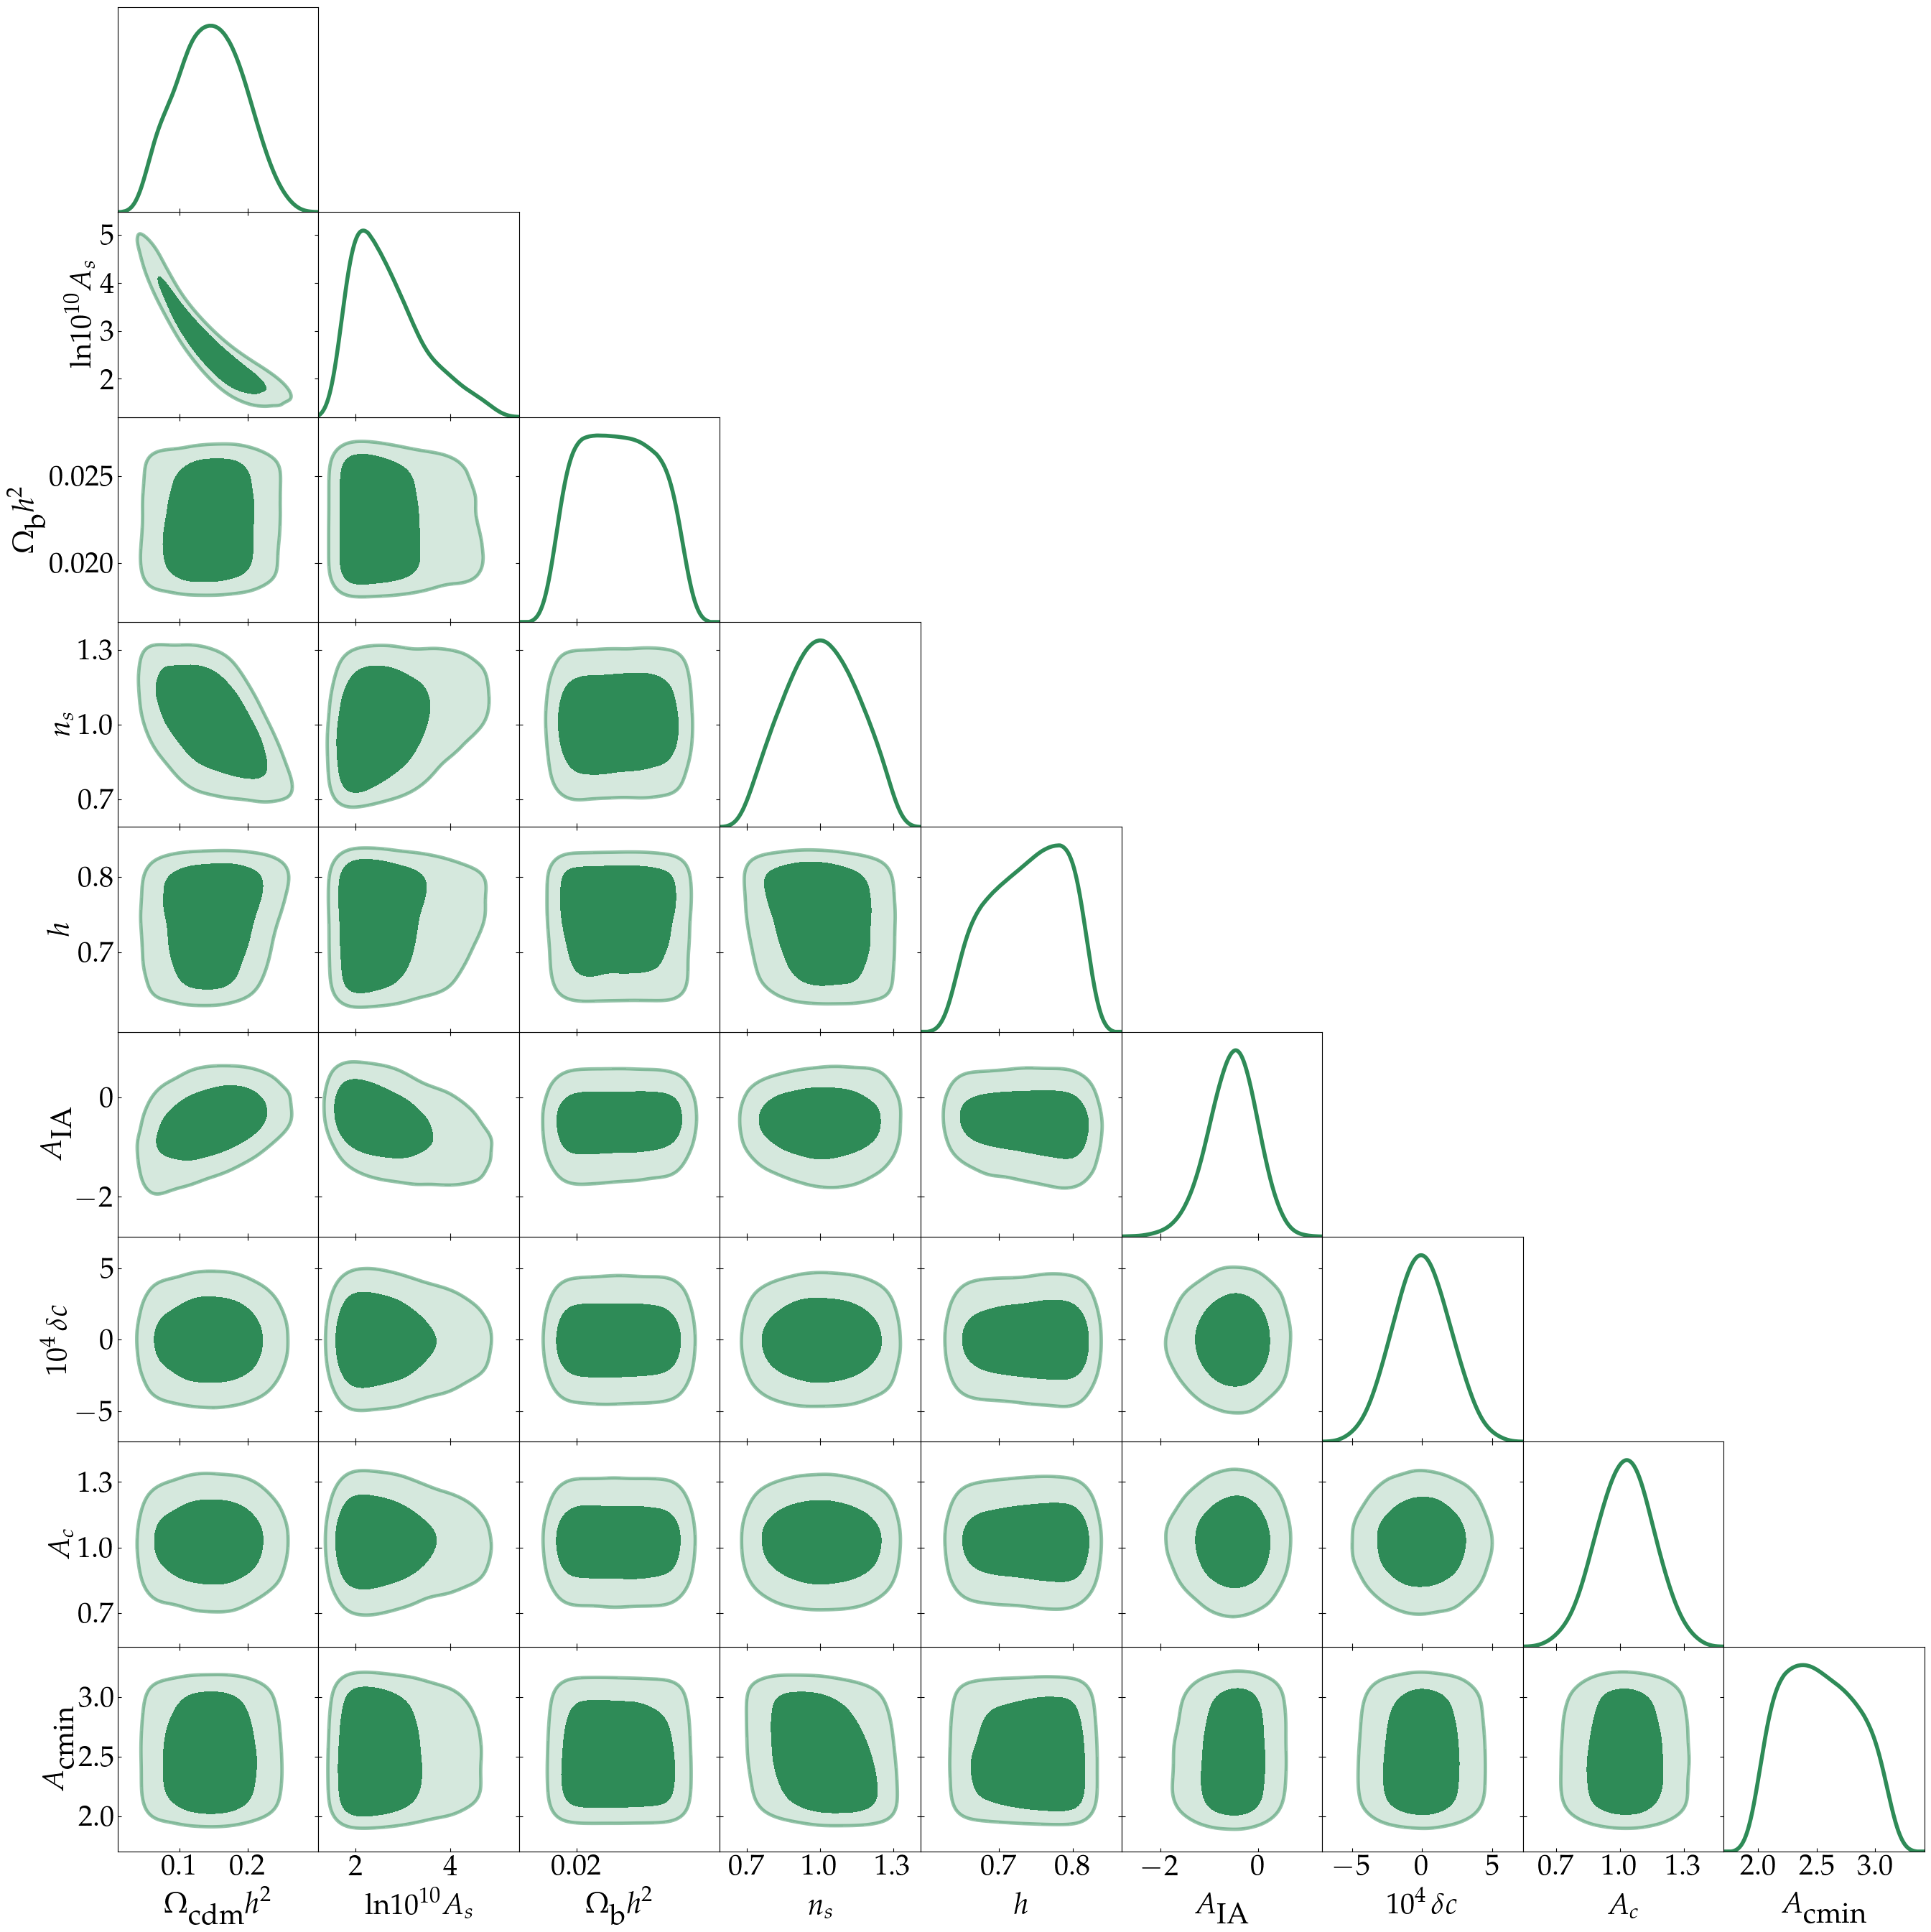

In [9]:
alpha = 0.90
contours = np.array([0.68,0.95])

G = plots.getSubplotPlotter(subplot_size=3)
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.num_plot_contours = 2
G.settings.lw_contour = 5
G.settings.axes_fontsize = 30
G.settings.lab_fontsize = 30
G.settings.fontsize = 35 # important for padding in x-axis 
G.settings.legend_fontsize = 50
samplesPlot.updateSettings({'contours': [0.68, 0.95]})
G.triangle_plot([samplesPlot], filled = [True], contour_colors=[c1], contour_lws=[4], contour_ls=['-'], rasterized = True)
plt.savefig('../results/Paper/triangle_plot.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

# 1D Distribution for the $S_{8}$ Parameter

In [10]:
def load_data(folder: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    omega_cdm
    ln10^{10}A_s
    omega_b
    n_s
    h
    A_IA
    c_min
    dc
    Ac
    Omega_m
    sigma8
    """
    
    # the full path to the file 
    loc = PATH + folder + '/'
    all_files = os.listdir(PATH + folder)
    
    # we grab all the files which contain the samples 
    files = np.array(all_files)[['__' in f for f in all_files]]
    
    # empty list to record the samples 
    samples = []
    
    for file in files:
        
        samples.append(np.loadtxt(loc + file))
        
    samples = np.concatenate(samples)
    nsamples = samples.shape[0]
    
    # compute S_8 
    S8 = samples[:,-1] * np.sqrt(samples[:,-2] / 0.3)
    S8 = S8.reshape(nsamples, 1) 
    Om = samples[:,-2].reshape(nsamples, 1)
    
    S8_Om = np.concatenate([Om, S8], axis = 1)
    
    return samples, S8_Om

### Planck

In [11]:
folder = '/Users/arrykrishna/Desktop/Planck/base/plikHM_TTTEEE_lowl_lowE/'

c1 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_1.txt')
c2 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_2.txt')
c3 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_3.txt')
c4 = np.loadtxt(folder + 'base_plikHM_TTTEEE_lowl_lowE_4.txt')

s1 = np.array([c1[:,31], c1[:,36]]).T
s2 = np.array([c2[:,31], c2[:,36]]).T
s3 = np.array([c3[:,31], c3[:,36]]).T
s4 = np.array([c4[:,31], c4[:,36]]).T

samples_planck = np.concatenate([s1, s2, s3, s4])

In [12]:
Nset = 5
random = {'R'+ str(i+2): load_data('KV-450-Bayes-Random-Set-'+str(i+2)) for i in range(Nset)}

In [13]:
labels = [r'$\Omega_{\textrm{m}}$', r'$S_{8}$']
ndim = len(labels)
names = ["x%s"%i for i in range(ndim)]


lab1 = r'Set 1'
lab2 = r'Set 2'
lab3 = r'Set 3'
lab4 = r'Set 4'
lab5 = r'Combined'
lab6 = r'Planck (2018)'

# Previously - we were using [2, 3, 4, 5, 'combined']
sam1 = MCSamples(samples=random['R2'][1], names = names, labels = labels, settings = settings, label=lab1)
sam2 = MCSamples(samples=random['R3'][1], names = names, labels = labels, settings = settings, label=lab2)
sam3 = MCSamples(samples=random['R4'][1], names = names, labels = labels, settings = settings, label=lab3)
sam4 = MCSamples(samples=random['R5'][1], names = names, labels = labels, settings = settings, label=lab4)
sam5 = MCSamples(samples=random['R6'][1], names = names, labels = labels, settings = settings, label=lab5)

samPlanck = MCSamples(samples=samples_planck, names = names, labels = labels, settings = settings, label=lab6)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [14]:
from matplotlib import cm
colors = cm.tab10.colors[0:6]

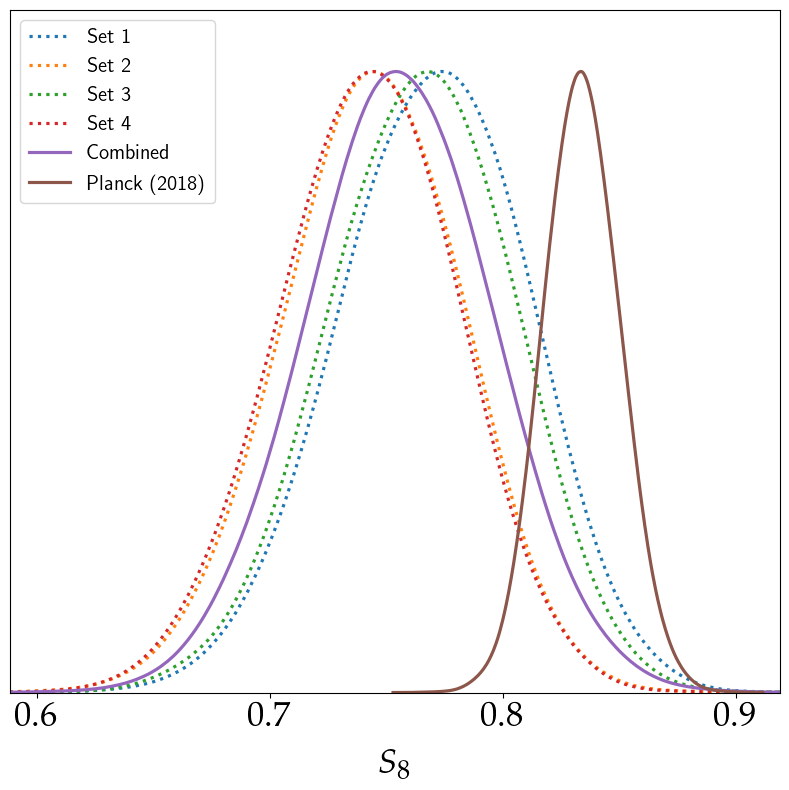

In [15]:
G = plots.get_single_plotter(width_inch=8, ratio=1)
G.settings.norm_prob_label = r'$p(S_{8})$'
G.settings.axes_fontsize = 25
G.settings.lab_fontsize = 25
G.plot_1d([sam1, sam2, sam3, sam4, sam5, samPlanck], 'x1', normalized=False, colors = colors, ls=[':']*4+['-', '-'])
G.add_legend([lab1, lab2, lab3, lab4, lab5, lab6], legend_loc='upper left', fontsize=15)
# plt.savefig('../results/Paper/1D_S8.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()

### For Weak Lensing

In [16]:
samples_kv = all_samples[:,[-2, -1]]

In [17]:
# we need to calculate the value of S_8
samples_kv[:,-1] = samples_kv[:,-1] * np.sqrt(samples_kv[:,0]/0.3)

### 2D Plot

In [18]:
# number of dimensions for plotting
ndim = 2

# some names for the parameters
names = ["x%s"%i for i in range(ndim)]
labels = [r'$\Omega_{\textrm{m}}$', r'$S_{8}$']

plan_plot = MCSamples(samples=samples_planck,names=names, labels=labels, settings=settings)
kv_plot = MCSamples(samples=samples_kv, names=names, labels=labels, settings=settings)

Removed no burn in
Removed no burn in


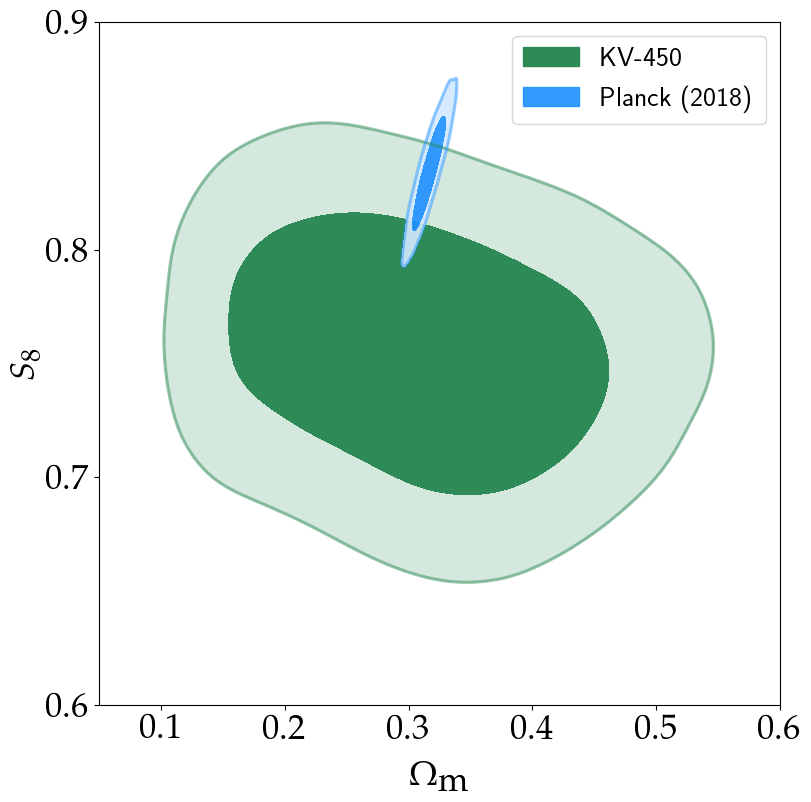

In [19]:
G = plots.getSinglePlotter(width_inch=8, ratio=1)
G.settings.num_plot_contours = 2
G.settings.lw_contour = 1
G.settings.axes_fontsize = 25
G.settings.lab_fontsize = 25
G.settings.fontsize = 25 # important for padding in x-axis 
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.legend_fontsize = 20
kv_plot.updateSettings({'contours': [0.68, 0.95]})
plan_plot.updateSettings({'contours': [0.68, 0.95]})
G.plot_2d([kv_plot, plan_plot], 'x0', 'x1', filled=[True, True], colors=['seagreen', 'dodgerblue'], rasterized=True)
G.add_legend(['KV-450', 'Planck (2018)'], legend_loc='upper right');
plt.xlim(0.05, 0.60)
plt.ylim(0.60, 0.90)
plt.savefig('../results/Paper/S8_Omega_Matter.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()